# Introduction
## "Building a Cross-Validated Linear Regression Model to Predict Passenger Vehicle Weight"

Our group consists of four members, and this is a collaborative project. The members are:

- Mahesh Rajendra
- Bhavitha Bojja
- Mamatha Singh
- Nandini Srirapu



## Data Summary

- In the cleaned dataset there are 203 rows and 9 columns in which target variable is 'curb-weight '.
- According to the data dictionery "https://archive.ics.uci.edu/ml/datasets/Automobile" the following are the datatypes of the 9 columns.
 - 'height': Numerical/Continous
 - 'width' : Numerical/Continous
 - 'length': Numerical/Continous
 - 'wheel-base' : Numerical/Continous
 - 'engine-size' : Numerical/Discrete
 - 'horsepower' : Numerical/Continous
 - 'peak-rpm': Numerical/Continous
 - 'city-mpg': Numerical/Discrete
 - 'curb-weight' : Numerical/Discrete


## Methodology

This assignment is divided into four phases, covering everything from acquisition of data to model validation.

1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Wrangling** : In this phase, raw data is transformed and structured into a more usable format for analysis and modeling.
 - Assigned appropriate column names.
 - Extracted the necessary attributes as a separate dataset from the entire dataset.
 - Corrected data types, removed invalid and null values.

 3. **Exploratory Data Analysis** : In this phase, the data is examined to understand its key characteristics and reveal patterns and relationships. This involves techniques such as visualizations and statistical summaries. The insights gained from this analysis assist in subsequent phases by guiding in feature selection and helping to choose the most appropriate algorithms.

 4. **Model Development and Evaluation** : Two regression models, linear and ridge, were picked and evaluated through k-fold cross-validation, with R-squared scores serving as a measure of model fit.

## Challenges Encountered and Steps Taken

- The dataset lacked clearly labeled columns, making it difficult to work with. Columns were assigned based on the dataset description, and only relevant features like height, width, engine-size, etc., were selected for analysis.
-  Data quality issues arose due to invalid values ('?') in the horsepower and peak-rpm columns. These invalid values were eliminated, and the columns were transformed into a numeric format for subsequent analysis.

# Data Acquisition

In [20]:
# import libraries
import pandas as pd
import numpy as np

In [21]:
#load dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/main/DSM2_Data.csv", header = None)


In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


- The initial dataset lacked defined column names, which was addressed during the data wrangling phase

# Data wrangling

In [23]:

# defines all columns
columns=['symboling','normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# assings column names to the dataset
df.columns = columns

In [25]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [9]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [31]:
# defines required columns
req_columns =["height", "width", "length", "wheel-base",
"engine-size", "horsepower", "peak-rpm", "city-mpg", "curb-weight"]

# creats a dataframe with required columns
vehicle_df = df[req_columns]



In [11]:
#cheking for null values
vehicle_df.isna().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     0
peak-rpm       0
city-mpg       0
curb-weight    0
dtype: int64

In [12]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       205 non-null    float64
 1   width        205 non-null    float64
 2   length       205 non-null    float64
 3   wheel-base   205 non-null    float64
 4   engine-size  205 non-null    int64  
 5   horsepower   205 non-null    object 
 6   peak-rpm     205 non-null    object 
 7   city-mpg     205 non-null    int64  
 8   curb-weight  205 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


 - There are some invalid symbols "?" in the data which needs to replaced.
 - The variables "horsepower","peak-rpm" are supposed to be numerical but they are in String.


In [13]:
# replace '?' in horsepower column with 'NaN'
vehicle_df["horsepower"].replace('?', np.nan, inplace = True)

# replace '?' in peak-rpm column with 'NaN'
vehicle_df["peak-rpm"] .replace('?', np.nan, inplace = True)

C:\Users\Bhavitha\AppData\Local\Temp\ipykernel_48312\3022164944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df["horsepower"].replace('?', np.nan, inplace = True)
C:\Users\Bhavitha\AppData\Local\Temp\ipykernel_48312\3022164944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df["peak-rpm"] .replace('?', np.nan, inplace = True)


In [14]:
# converts horsepower column to numeric
vehicle_df["horsepower"] = pd.to_numeric(vehicle_df["horsepower"])

# converts peak-rpm column to numeric
vehicle_df["peak-rpm"] = pd.to_numeric(vehicle_df["peak-rpm"])

C:\Users\Bhavitha\AppData\Local\Temp\ipykernel_48312\2048140602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df["horsepower"] = pd.to_numeric(vehicle_df["horsepower"])
C:\Users\Bhavitha\AppData\Local\Temp\ipykernel_48312\2048140602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_df["peak-rpm"] = pd.to_numeric(vehicle_df["peak-rpm"])


In [15]:
# to check on datatypes
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   height       205 non-null    float64
 1   width        205 non-null    float64
 2   length       205 non-null    float64
 3   wheel-base   205 non-null    float64
 4   engine-size  205 non-null    int64  
 5   horsepower   203 non-null    float64
 6   peak-rpm     203 non-null    float64
 7   city-mpg     205 non-null    int64  
 8   curb-weight  205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


- Data types have been corrected, and a few null values need to be removed before training the model.

In [16]:
# removes null rows
vehicle_df = vehicle_df.dropna()

# to check nulls
vehicle_df.isnull().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     0
peak-rpm       0
city-mpg       0
curb-weight    0
dtype: int64

In [26]:
# cleaned data
vehicle_df.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
1,48.8,64.1,168.8,88.6,130,111.0,5000.0,21,2548
2,52.4,65.5,171.2,94.5,152,154.0,5000.0,19,2823
3,54.3,66.2,176.6,99.8,109,102.0,5500.0,24,2337
4,54.3,66.4,176.6,99.4,136,115.0,5500.0,18,2824


# Exploratory Data Analysis



## Univariate Analysis

In [108]:

import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
# function to plot histogram and box plots

def hist_box(col):
  fig, axes = plt.subplots(1, 2, figsize=(7, 4))

  # Histogram
  sns.histplot(data=vehicle_df, x=col, kde=True, ax=axes[0])
  axes[0].set_title(f"Histogram of {col}")
  axes[0].set_xlabel(f"{col}")
  axes[0].set_ylabel("Frequency")

  # Boxplot
  sns.boxplot(data=vehicle_df, x=col, ax=axes[1])
  axes[1].set_title(f"Boxplot of {col}")
  axes[1].set_xlabel(f"{col}")

  plt.tight_layout()
  plt.show()


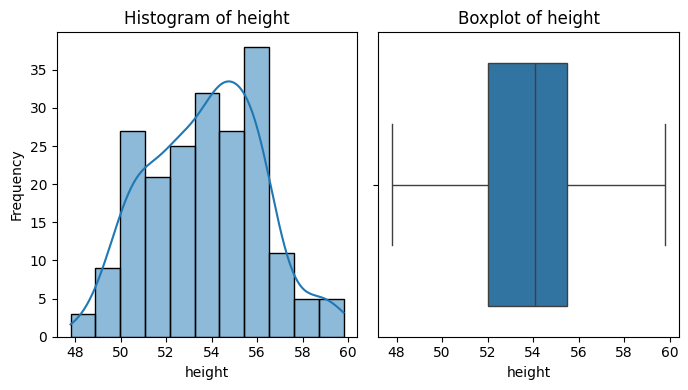

,height
count,203.000000
mean,53.733498
std,2.442864
min,47.800000
25%,52.000000
50%,54.100000
75%,55.500000
max,59.800000


In [110]:
# ploting for height variable
hist_box("height")

vehicle_df['height'].describe()

 -   The distribution seems to be slightly left-skewed.Most observations appears to fall between 50 and 56.

-  The height variable had a median value of around 54 units, with a minimum of 47.8 units and a maximum of 59.8 units.

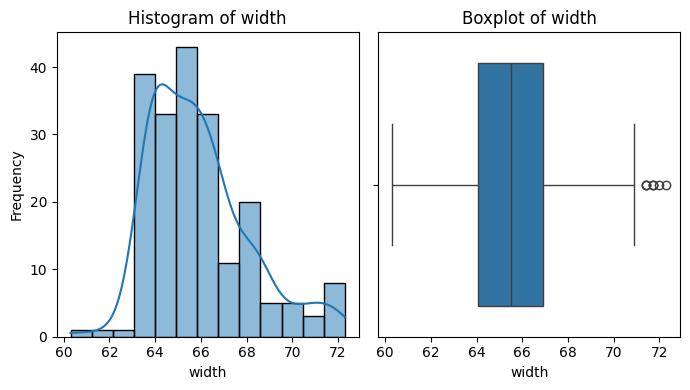

,width
count,203.000000
mean,65.901478
std,2.154835
min,60.300000
25%,64.050000
50%,65.500000
75%,66.900000
max,72.300000


In [111]:
# ploting for width variable
hist_box("width")

vehicle_df['width'].describe()

- The histogram shows a right-skewed distribution. Most values are concentrated on the left side, the majority of the data is centered around 64 to 68, with a peak at around 66.

- The width variable ranged from a minimum of 60 units to a maximum of 72 units, with a median of 65.5 units and a standard deviation of 2.1 units.


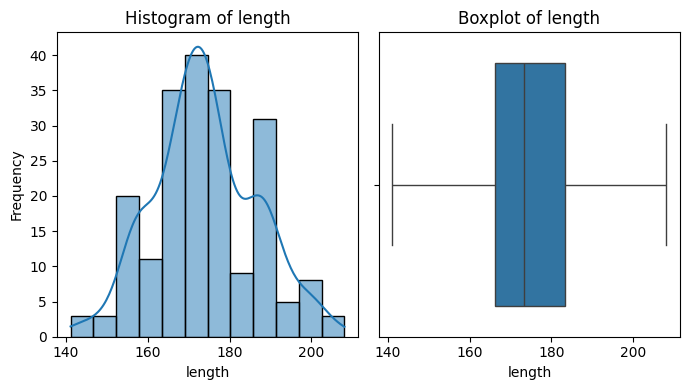

,length
count,203.000000
mean,173.999015
std,12.385511
min,141.100000
25%,166.300000
50%,173.200000
75%,183.300000
max,208.100000


In [112]:
# ploting for length variable
hist_box("length")

vehicle_df['length'].describe()

- The distribution of length appears to be approximately normal with a peak around 180. Most values fall between 160 and 190.
- The median is 173and the interquartile range (IQR) spans from around 160 to 190.

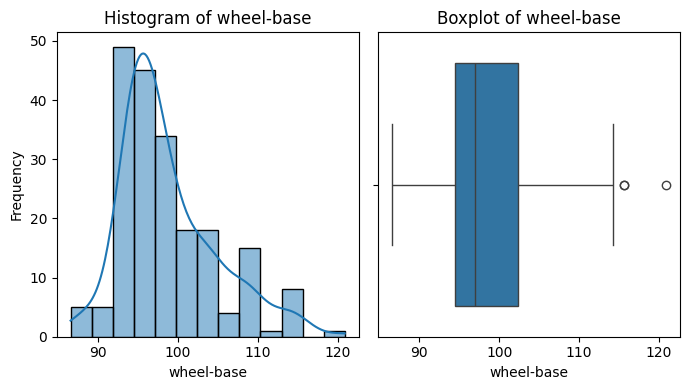

,wheel-base
count,203.000000
mean,98.782759
std,6.045680
min,86.600000
25%,94.500000
50%,97.000000
75%,102.400000
max,120.900000


In [113]:
# ploting for wheel-base variable
hist_box("wheel-base")

vehicle_df['wheel-base'].describe()

-  The distribution is right-skewed, with most values between 90 and 105. A few higher values are pulling the tail to the right, indicating larger wheel-bases in the dataset.
- The median is around 98. The interquartile range (IQR) spans from around 90 to 105 with standard deviation of 6.04.

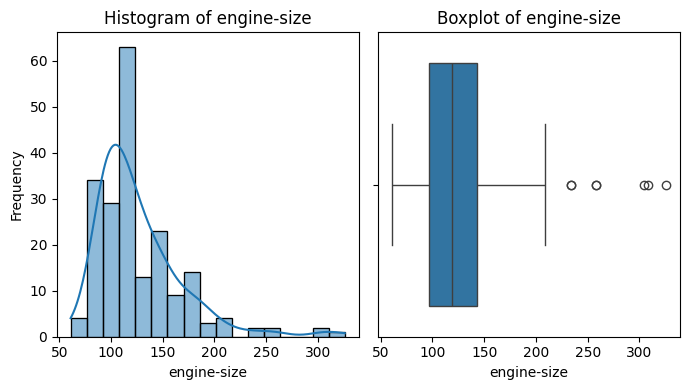

,engine-size
count,203.000000
mean,126.857143
std,41.845239
min,61.000000
25%,97.000000
50%,119.000000
75%,143.000000
max,326.000000


In [114]:
# ploting for engine-size variable
hist_box("engine-size")

vehicle_df['engine-size'].describe()


- The engine size data is positively skewed, with a single mode observed in the distribution.
- Engine sizes ranged from a minimum of 61 to a maximum of 326 units. The median engine size was 119, with the first quartile (Q1) at 97 and the third quartile (Q3) at 143."

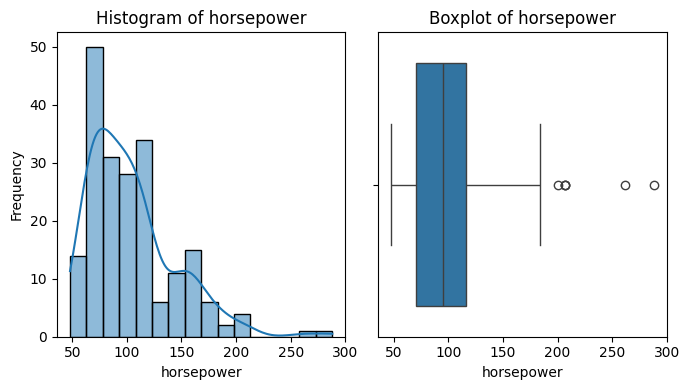

,horsepower
count,203.000000
mean,104.256158
std,39.714369
min,48.000000
25%,70.000000
50%,95.000000
75%,116.000000
max,288.000000


In [115]:
# ploting for horsepower variable
hist_box("horsepower")

vehicle_df['horsepower'].describe()

- The distribution of horsepower is right-skewed, with most values concentrated between 50 and 150. A few cars have higher horsepower values above 200.
- The median is around 100. The interquartile range spans from about 75 to 150.

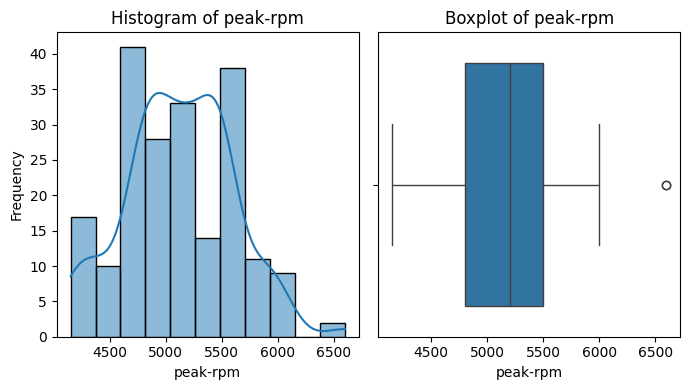

,peak-rpm
count,203.000000
mean,5125.369458
std,479.334560
min,4150.000000
25%,4800.000000
50%,5200.000000
75%,5500.000000
max,6600.000000


In [116]:
hist_box("peak-rpm")

vehicle_df['peak-rpm'].describe()

-  The distribution is slightly right-skewed, with most values falling between 4500 and 6000 RPM.There is a small peak around 5000–5500 RPM, indicating the most common range for peak RPM and few values approach 6500 RPM.
-  The median is around 5200 RPM. The interquartile range (IQR) spans from about 4800 to 5800 RPM.

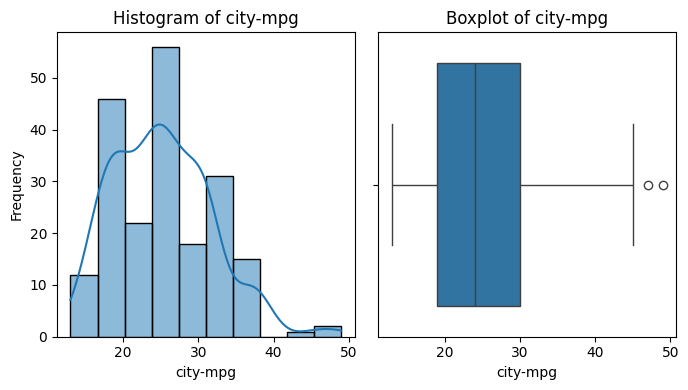

,city-mpg
count,203.000000
mean,25.241379
std,6.570702
min,13.000000
25%,19.000000
50%,24.000000
75%,30.000000
max,49.000000


In [117]:
# ploting for city-mpg variable
hist_box("city-mpg")

vehicle_df['city-mpg'].describe()

-The distribution is slightly right-skewed, with most values between 20 and 35 MPG. There is a clear peak around 25 MPG, indicating that the majority of vehicles achieve this fuel efficiency in the city. Only few cars have higher city MPG values between 45 and 50.

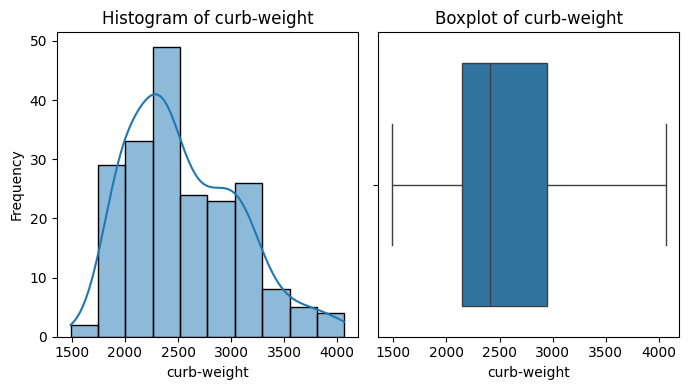

,curb-weight
count,203.000000
mean,2555.921182
std,523.205555
min,1488.000000
25%,2145.000000
50%,2414.000000
75%,2943.500000
max,4066.000000


In [118]:
hist_box("curb-weight")

vehicle_df['curb-weight'].describe()

- The distribution of curb-weight is slightly right-skewed, with most values concentrated between 2000 and 3000 lbs. There is a peak around 2500 lbs, suggesting that many vehicles fall into this weight category.
- The median is around 2750 lbs. The interquartile range (IQR) spans from about 2145 to 2943 lbs.


## Bivariate Analysis

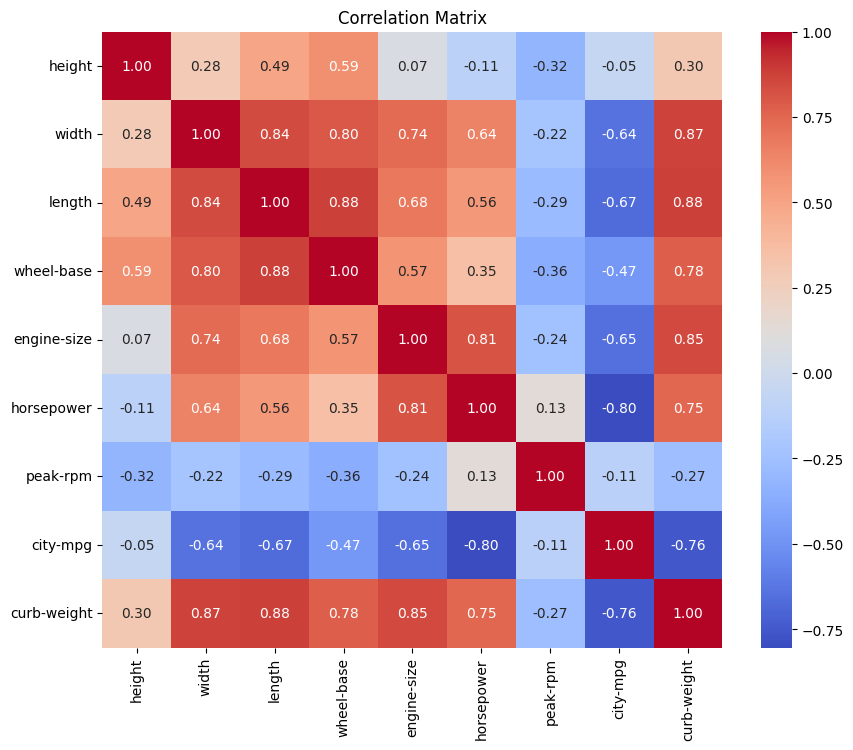

In [119]:
# Compute the correlation matrix
correlation_matrix = vehicle_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Do any of the explanatory variables appear
to be relatively more “predictive” of the response variable?

- **Positive Correlation**:

 - **Length**, **Width**, and **Engine Size** have a strong, positive correlation with curb weight. This suggests that as these variables increase, so does the curb weight of the vehicle. This is intuitively understandable, as larger vehicles with more powerful engines tend to weigh more.

- **Negative Correlation:**

 - **City MPG** has a strong, negative correlation with curb weight. This indicates that vehicles with higher fuel efficiency (lower city MPG) tend to weigh less. This is likely due to factors like smaller engine size, lighter materials, and more aerodynamic designs that contribute to fuel efficiency.

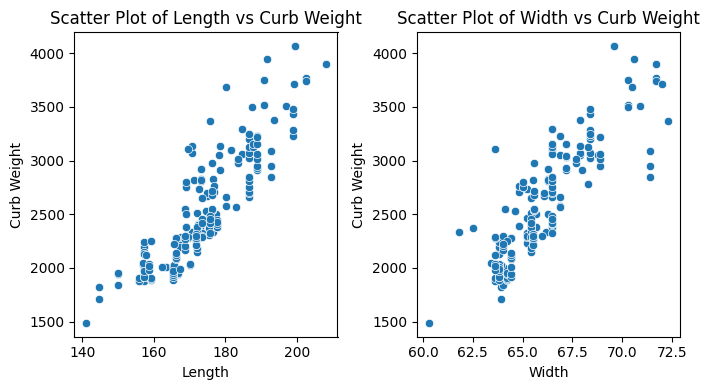

In [120]:
# scatter plots showing lenght and width Vs curb weigth

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# lenght vs curb weight
sns.scatterplot(x='length', y='curb-weight', data=vehicle_df, ax=axes[0])
axes[0].set_title('Scatter Plot of Length vs Curb Weight')
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Curb Weight')


# width vs curb weight
sns.scatterplot(x='width', y='curb-weight', data=vehicle_df, ax=axes[1])
axes[1].set_title('Scatter Plot of Width vs Curb Weight')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Curb Weight')

plt.tight_layout()
plt.show()



- The data suggests a strong, positive linear correlation between vehicle length and width with curb weight.

-  In summary,vehicles with high lenght or width tend to have higher curb weights, which aligns with expectations.



-  The plot shows a positive correlation between width and curb weight. As the width of a vehicle increases, its curb weight tends to increase as well.
The data points form a clear upward trend, indicating that wider vehicles are generally heavier. There is some variability, but overall, the relationship between width and curb weight is consistent.

-   In summary, wider vehicles tend to have higher curb weights, which aligns with expectations. This positive correlation suggests that vehicle width is an important factor in determining curb weight.



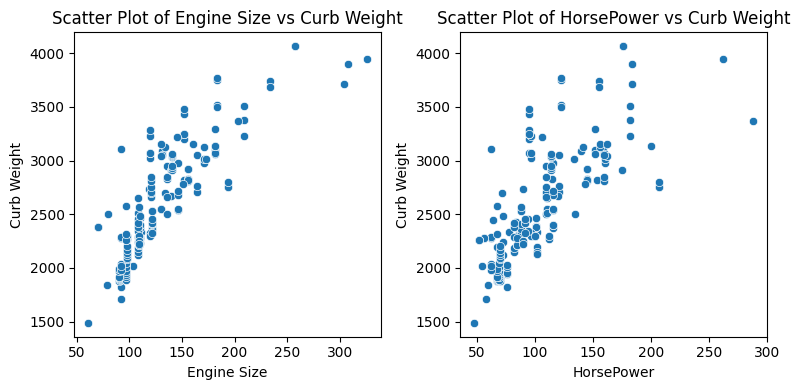

In [121]:
# scatter plots engine size and horsepower Vs curb weigth

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# scatter plot on engine size and curb weight
sns.scatterplot( y='curb-weight',x='engine-size', data=vehicle_df, ax= axes[0])
axes[0].set_title('Scatter Plot of Engine Size vs Curb Weight')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Curb Weight')


# scatter plot on horsepower and curb weight
sns.scatterplot(x='horsepower', y='curb-weight', data=vehicle_df, ax= axes[1])
axes[1].set_title('Scatter Plot of HorsePower vs Curb Weight')
axes[1].set_xlabel('HorsePower')
axes[1].set_ylabel('Curb Weight')


plt.tight_layout()
plt.show()

 - There appears to be a strong, positive linear correlation between engine size and curb weight. As engine size increases, curb weight tends to increase as well.
 - Similar to the first plot, there appears to be a positive linear correlation between horsepower and curb weight. However, the correlation might be slightly weaker than the one between engine size and curb weight.

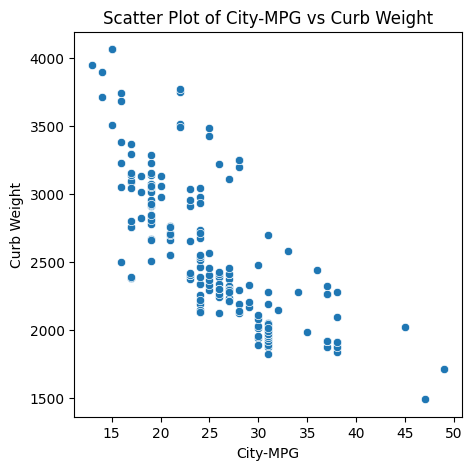

In [122]:
# scatter plot on curb weight and ccity-mpg.
plt.figure(figsize=(5, 5))
sns.scatterplot( y='curb-weight',x='city-mpg', data=vehicle_df)
plt.title('Scatter Plot of City-MPG vs Curb Weight')
plt.xlabel('City-MPG')
plt.ylabel('Curb Weight')
plt.show()




*   The scatter plot shows a negative correlation between city-MPG and curb weight. As city-MPG increases, curb weight tends to decrease.
Heavier vehicles tend to have lower fuel efficiency in the city, which aligns with typical automotive trends.

*   The data points are fairly concentrated around certain ranges, but the overall inverse relationship is clear

*   In summary, heavier vehicles generally have lower city MPG, indicating that larger, heavier cars are less fuel-efficient in city driving conditions. This inverse relationship could be useful for further analysis or predictive modeling.






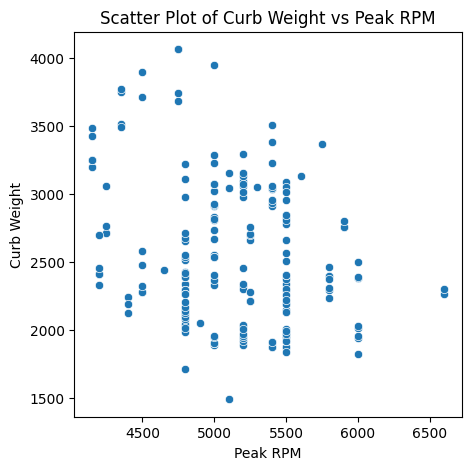

In [123]:
# scatter plot on curb-weight and peak-rpm
plt.figure(figsize=(5, 5))
sns.scatterplot(y='curb-weight', x='peak-rpm', data=vehicle_df)
plt.title('Scatter Plot of Curb Weight vs Peak RPM')
plt.ylabel('Curb Weight')
plt.xlabel('Peak RPM')
plt.show()


- There doesn't appear to be a clear, linear relationship between curb weight and peak RPM. The data points are scattered, indicating a weak or no correlation between the two variables

## Model Construction And Evaluation

In [124]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [125]:

# Separate target variable and explanatory variables
y = vehicle_df['curb-weight']
x = vehicle_df.drop('curb-weight', axis=1)

# picking explanatory variables for linear regression model
x1 = x[['width','length', 'city-mpg', 'horsepower']]

# Split data into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y, test_size=0.2, random_state=42)

# Gets shape of test and training data
print(f"Shape of X_train: {X_train1.shape}")
print(f"Shape of X_test: {X_test1.shape}")
print(f"Shape of Y_train: {Y_train1.shape}")
print(f"Shape of Y_test: {Y_test1.shape}")



Shape of X_train: (162, 4)
Shape of X_test: (41, 4)
Shape of Y_train: (162,)
Shape of Y_test: (41,)


- The variables 'width', 'length', 'city-mpg', and 'horsepower' were chosen as predictors for the linear regression model. Correlation analysis revealed that 'length' and 'width' had significant positive relationships with the target variable, while 'horsepower' demonstrated a moderately positive correlation. In contrast, 'city-mpg' had a strong negative correlation."

In [132]:

# Create a Linear Regression model object
linear_reg = LinearRegression()

# Define the k-fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for linear regression model
scores_m1 = cross_val_score(linear_reg, X_train1, Y_train1, cv=kf, scoring='r2')

# Print the cross-validation scores and accuracy
print("Cross-Validation Scores for linear regression model:", scores_m1)
print("Accuracy for linear regression model:", np.mean(scores_m1))


Cross-Validation Scores for linear regression model: [0.91698088 0.90175651 0.86733674 0.87933398 0.82048335]
Accuracy for linear regression model: 0.8771782949935825


- The training data is splited into 5 sets and model tarined on 4 diffrent folds of training data in each split.

- The model's performance across the five cross-validation splits was assessed as 0.91, 0.90, 0.86, 0.87, and 0.82.

- Linear regression model shows accuracy(average of cross-validation scores) of 87%.



In [127]:
# picking explanatory variables for linear regression model
x2 = x[['length','engine-size', 'city-mpg', 'wheel-base']]

# Split data into training and testing sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y, test_size=0.2, random_state=42)

# Gets shape of test and training data
print(f"Shape of X_train: {X_train2.shape}")
print(f"Shape of X_test: {X_test2.shape}")
print(f"Shape of Y_train: {Y_train2.shape}")
print(f"Shape of Y_test: {Y_test2.shape}")

Shape of X_train: (162, 4)
Shape of X_test: (41, 4)
Shape of Y_train: (162,)
Shape of Y_test: (41,)


- Given their significant correlations, the variables 'length', 'engine-size', 'city-mpg', and 'wheel-base' were chosen as predictor variables for the model.

In [131]:
# create Ridge Regression model with alpha 1
ridge_reg = Ridge(alpha=1.0)

# Define the k-fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for ridge regression
scores_m2 = cross_val_score(ridge_reg, X_train2, Y_train2, cv=kf, scoring='r2')

# Print the cross-validation scores and accuracy
print("Cross-Validation Scores for ridge regression model:", scores_m2)
print("Accuracy for ridge regression model:", np.mean(scores_m2))

Cross-Validation Scores for ridge regression model: [0.89081886 0.92024188 0.91991048 0.89289146 0.8861323 ]
Accuracy for ridge regression model: 0.9019989955069312


- Similar to before, training data is splited into 5 sets and model tarined on 4 diffrent folds of training data in each split.

- The model's performance across the five cross-validation folds was assessed as 0.89, 0.92, 0.91, 0.89, and 0.88.

- Ridge regression model shows accuracy(average of cross-validation scores) of 90%.



## Conclusions

- We may conclude that the ridge regression model outperforms the linear regression model by more than 10% based on a comparison of the k-fold cross validation scores of the two models. The ridge regression model has a higher accuracy of 90%, while the linear regression model only obtained 87% accuracy.


